In [1]:
import pandas as pd
from math import log
from matplotlib import pyplot as plt
import seaborn as sns 
df = pd.read_csv('Loan_Data.csv')
df[['fico_score','default']].head(20)

,fico_score,default
0,605,0
1,572,1
2,602,0
3,612,0
4,631,0
5,697,0
6,722,0
7,545,1
8,676,0
9,447,0


<AxesSubplot:xlabel='fico_score', ylabel='Density'>

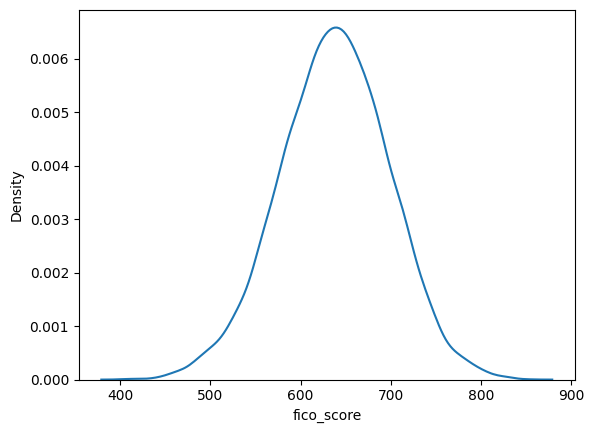

In [2]:
sns.kdeplot(df['fico_score'])

In [3]:
(df['fico_score']).describe()

count    10000.000000
mean       637.557700
std         60.657906
min        408.000000
25%        597.000000
50%        638.000000
75%        679.000000
max        850.000000
Name: fico_score, dtype: float64

<AxesSubplot:xlabel='fico_score', ylabel='Density'>

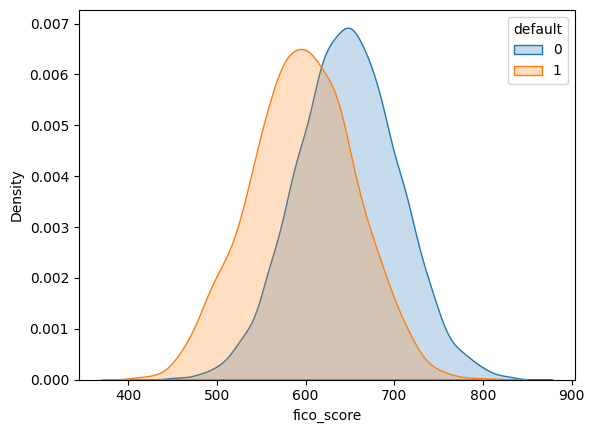

In [8]:
sns.kdeplot( x = df['fico_score'].loc[df['default'] == 0], hue=df['default'] , fill=True)
sns.kdeplot( x = df['fico_score'].loc[df['default'] == 1], hue=df['default'], fill=True)

10000 10000


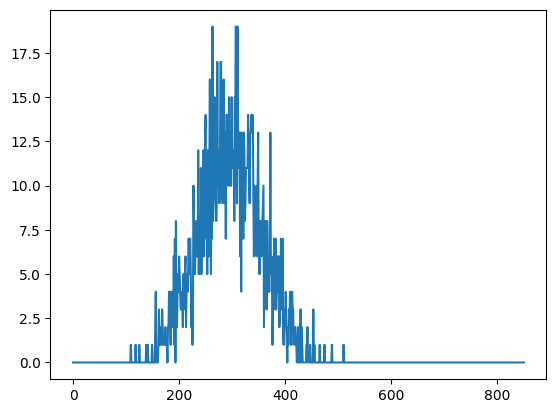

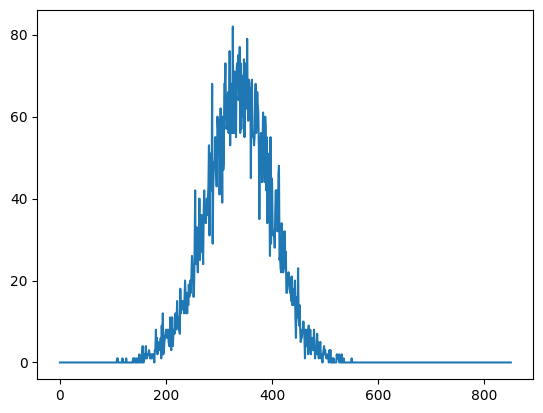

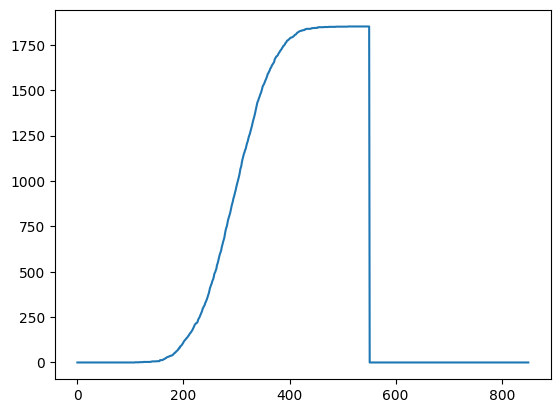

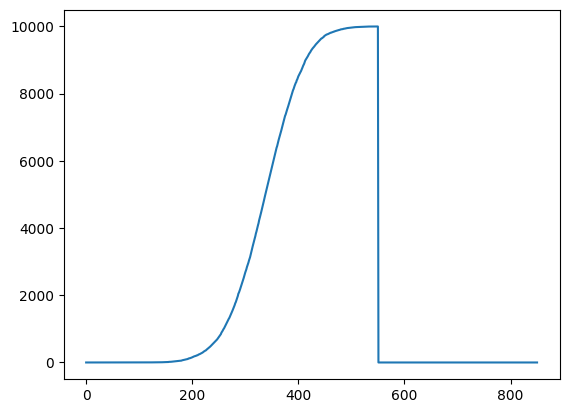

In [4]:

x = df['default'].to_list()
y = df['fico_score'].to_list()
n = len(x)
print (len(x), len(y))


default = [0 for i in range(851)]
total = [0 for i in range(851)]
# collect all scores and defaults 
for i in range(n):
    y[i] = int(y[i])
    default[y[i]-300] += x[i]
    total[y[i]-300] += 1
plt.plot(default)
plt.show()
plt.plot(total)
plt.show()
# make lists culmulative 
for i in range(0, 551):
    default[i] += default[i-1]
    total[i] += total[i-1]
plt.plot(default)
plt.show()
plt.plot(total)
plt.show()


In [7]:
import numpy as np
    
def log_likelihood(n, k):
    p = k/n
    if (p==0 or p==1):
        return 0
    return k*np.log(p)+ (n-k)*np.log(1-p)
# 10 bins 
r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]
print(dp[2][5][1])
for i in range(r+1):
    for j in range(551):
        if (i==0):
            #0th bin 
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if (total[j]==total[k]):
                    continue
                if (i==1):
                    #1st bin
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                        dp[i][j][0] = dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j]-default[k])
                        dp[i][j][1] = k

print(dp) 
print(dp[2][5][1])                                                   
print (round(dp[r][550][0], 4))
                                                     
k = 550
l = []
while r >= 0:
    l.append(k+300)
    k = dp[r][k][1]
    r -= 1

print(l)


0
[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 